In [1]:
from Lyapunov import *
from dynamics_toolkit import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint, solve_ivp, ode
from tqdm import tqdm
from torch.autograd.functional import jacobian
from torch import tensor, dot, matmul, transpose, stack, log
from scipy.linalg import block_diag, circulant
from scipy.stats import dirichlet, multivariate_normal
from scipy.special import xlogy
from itertools import product, combinations

In [2]:
def replicator1(x,t,A,B):
    dx = np.zeros(6)
    dx[:3] = x[:3] * (A @ x[3:] - (np.transpose(x[:3]) @ (A@x[3:])))
    dx[3:] = x[3:] * (B.T @ x[:3] - (np.transpose(x[:3]) @ (B@x[3:])))
    return dx

def adaptation1(x,t,A,B,alpha1,alpha2):
    dx = np.zeros(6)
    dx[:3] = x[:3] * (A @ x[3:] - (np.transpose(x[:3]) @ (A@x[3:])) + alpha1 * (-np.log(x[:3]) + np.sum(xlogy(x[:3], x[:3]))))
    dx[3:] = x[3:] * (B.T @ x[:3] - (np.transpose(x[:3]) @ (B@x[3:]))) + alpha2 * (-np.log(x[3:]) + np.sum(xlogy(x[3:], x[3:])))
    return dx

In [3]:
epsilonx = 0.5
epsilony = -0.3
A = np.array([[epsilonx, 1, -1], [-1, epsilonx, 1], [1, -1, epsilonx]])
B = np.array([[epsilony, 1, -1], [-1, epsilony, 1], [1, -1, epsilony]])

In [8]:
ts = np.linspace(0,40,401)
x_int = np.array([0.26,0.113333,0.626667,0.165,0.772549,0.062451])
xt_adaptive = odeint(adaptation1, x_int, ts, args=((A,B.T,0.025,0.01)))
# xt_adaptive_sol = solve_ivp(replicator1, [0, ts[-1]], y0=x_int, method='RK45', t_eval=ts, args=((A,B.T))) 

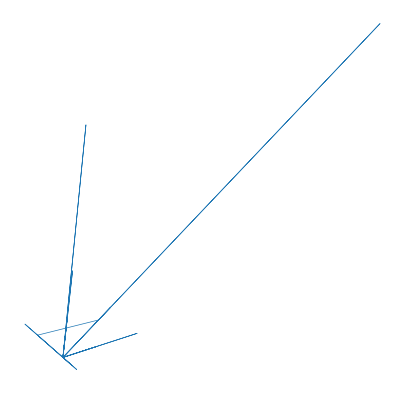

In [9]:
orbit = proj_6D_2D(xt_adaptive.T)
fig, ax = initial_6D_2D_figure(figsize=(7,7))
ax.plot(orbit[0,:], orbit[1,:], linewidth=.7)

In [31]:
orbit.max()

2362063382134662.0

In [ ]:
xlogy()